#  About the project and data

In this project, we examine six examples of machine learning models in the field of classification.<br>
These six examples are:
**KNN, GradientBoostingClassifier, LogisticRegression, SVM, DecisionTreeClassifier, RandomForestClassifier**<br>
In each of the models, I tried to put the best value for each parameter to have the best fit and the closest prediction.<br>
I use 4 methods to evaluate each algorithm.
**accuracy_score , f1-csore , log_loss , jacard**<br>
You can see the results below.

# Load library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from csv file

In [29]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("heart-dataset.csv")


Saving heart-dataset.csv to heart-dataset (1).csv


**Standardize** the names of some columns according to the needs of the issues

In [30]:
df.rename(columns ={"caa":"ca",'thalachh':'thalach','restecg':'rest-ecg'}, inplace =True)

# Knowing the data

In [31]:
df.shape

(303, 14)

In [32]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest-ecg,thalach,exng,oldpeak,slp,ca,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest-ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Here we can see the values ​​that each column has

In [34]:
for column in df.columns:
    print("------  " + column + "  ------")
    print(df[column].value_counts())

------  age  ------
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
------  sex  ------
sex
1    207
0     96
Name: count, dtype: int64
------  cp  ------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------  trtbps  ------
trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1

# Pre-processing

In the **ca column**, we see the value of 4, which is our  **noise** in this column.
Considering that the number of our data is small, instead of removing the noises,<br> we tried to go the noises with fillna to the conventional data for the ca column and used the median

In [35]:
print(df['ca'].value_counts())

df['ca'] =df['ca'].replace(4,np.NAN)
print(df['ca'].value_counts())

df['ca'] =df['ca'].fillna(df['ca'].median())
print(df['ca'].value_counts())

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
ca
0.0    175
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


If there are duplicate rows in the data, we delete them

In [36]:
df.drop_duplicates()
df.shape


(303, 14)

In this section, we try to **measure the importance** of each data column.<br>
So that important columns for existing algorithms are separated and train data is examined on these columns.<br>
**Tree-based feature selection**<br>

I used **ExtraTreesClassifier** and its methods to check each feature.<br>
I observed the importance of each column and selected the columns thatI thought would give better output to our algorithms.<br>
I must say that at first all the columns were checked for the algorithms and the result was not the removal of some columns.

[0.06697823 0.05517923 0.12515025 0.06298363 0.05934828 0.01942588
 0.0346362  0.08269413 0.09343079 0.08030767 0.07931123 0.1395363
 0.10101819]


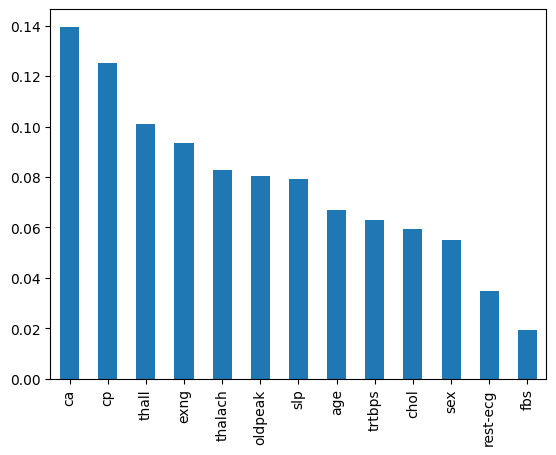

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest-ecg', 'thalach', 'exng', 'oldpeak', 'slp', 'ca', 'thall']


In [37]:
X_shape =df.iloc[:,0:13]
Y_shape =df['output']

from sklearn.ensemble import ExtraTreesClassifier

model =ExtraTreesClassifier()

model.fit(X_shape, Y_shape)
print(model.feature_importances_)
feat_importances =pd.Series(model.feature_importances_, index=X_shape.columns)
#show 13 columns of our fit
feat_importances.nlargest(13).plot.bar()
plt.show()

list1=feat_importances.keys().to_list()
print(list1)


Show hist of values have

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'rest-ecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

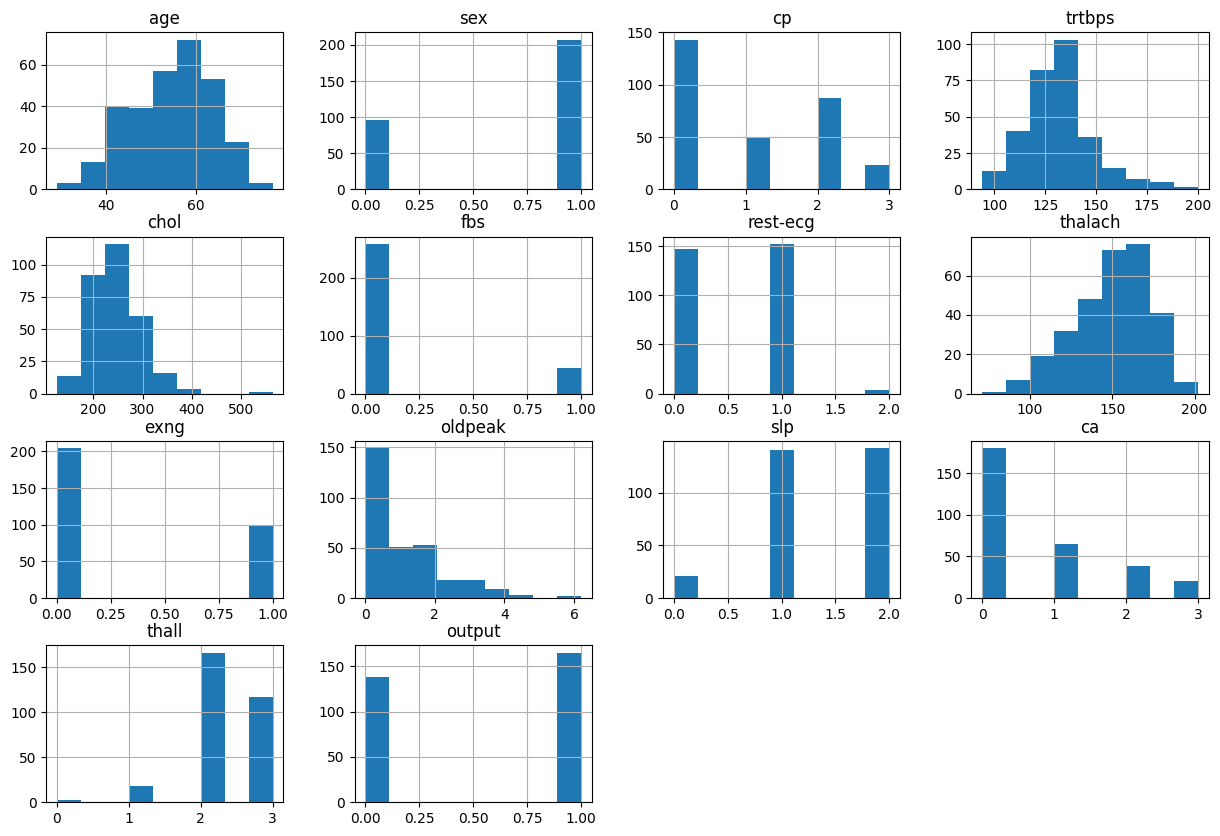

In [38]:
df.hist(figsize=(15,10), bins=9)

# Selection of features

In this part, I tried to remove the columns based on the importance of each column in the above model and my own knowledge, which resulted in 2 **rest-ecg and fbs** columns <br> and one **trtbps** column, which I think and the searches I did. It did not give better results

In [39]:
x=df[['age','sex','cp','chol','thalach','exng','oldpeak','slp','ca','thall']].values
x[:5]

array([[ 63. ,   1. ,   3. , 233. , 150. ,   0. ,   2.3,   0. ,   0. ,
          1. ],
       [ 37. ,   1. ,   2. , 250. , 187. ,   0. ,   3.5,   0. ,   0. ,
          2. ],
       [ 41. ,   0. ,   1. , 204. , 172. ,   0. ,   1.4,   2. ,   0. ,
          2. ],
       [ 56. ,   1. ,   1. , 236. , 178. ,   0. ,   0.8,   2. ,   0. ,
          2. ],
       [ 57. ,   0. ,   0. , 354. , 163. ,   1. ,   0.6,   2. ,   0. ,
          2. ]])

In [40]:
y=df['output'].values
y[:5]

array([1, 1, 1, 1, 1])

# Data normalization

In [41]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292, -0.25633371,  0.01544279,
        -0.69663055,  1.08733806, -2.27457861, -0.71113139, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707,  0.07219949,  1.63347147,
        -0.69663055,  2.12257273, -2.27457861, -0.71113139, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.81677269,  0.97751389,
        -0.69663055,  0.31091206,  0.97635214, -0.71113139, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.19835726,  1.23989692,
        -0.69663055, -0.20670527,  0.97635214, -0.71113139, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463,  2.08204965,  0.58393935,
         1.43548113, -0.37924438,  0.97635214, -0.71113139, -0.51292188]])

# Training data

In [42]:
from sklearn.model_selection import train_test_split
X_train ,x_test , Y_train , y_test =train_test_split(x , y, test_size=0.2 , random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


# Models for find best

Here we review 6 of the most famous classification models for this dataset.<br>
Then we evaluate each of the models and tried to put the best parameters in the models

We will try **KNN** as the first model.<br>
We find the best value of n in this way

In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [44]:
from sklearn import metrics

kn =10
Accuracy =np.zeros((kn-1))

for number in range(1,kn):
    neighbors =KNeighborsClassifier(n_neighbors = number)
    neighbors.fit(X_train,Y_train)
    yhat =neighbors.predict(x_test)
    Accuracy[number-1] =metrics.accuracy_score(y_test, yhat)

Accuracy

array([0.7704918 , 0.78688525, 0.83606557, 0.85245902, 0.85245902,
       0.85245902, 0.8852459 , 0.85245902, 0.8852459 ])

Show accuracy in plot

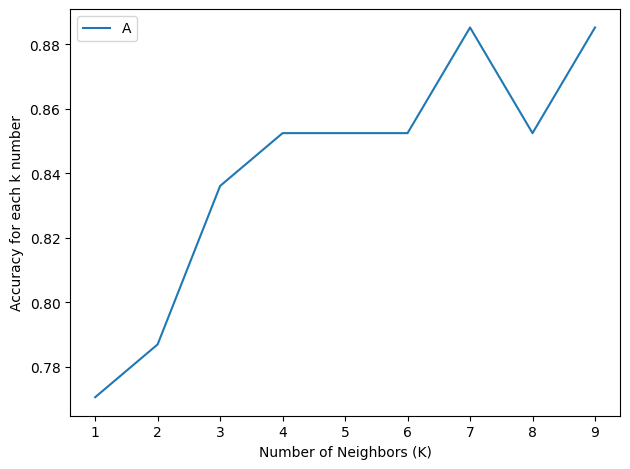

In [45]:
plt.plot(range(1,kn), Accuracy)
plt.legend('Accuracy')
plt.ylabel('Accuracy for each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We get the most accuracy from the َAccuracy array

In [46]:
max_k_neighbor =Accuracy.argmax()

neigh = KNeighborsClassifier(max_k_neighbor + 1)
neigh.fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [47]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 0, 1, 1, 1])

# Evaluation KNN

Now we implemented 4 classification model evaluation methods for each model.
    

In [48]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

**accuracy_score**

In [49]:
acc_k7=metrics.accuracy_score(y_test, yhat)
acc_k7

0.8852459016393442

**jaccard_score**

In [50]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [51]:
log_loss(y_test, yhat)

4.136156946292132

**f1_score**

In [52]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [53]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


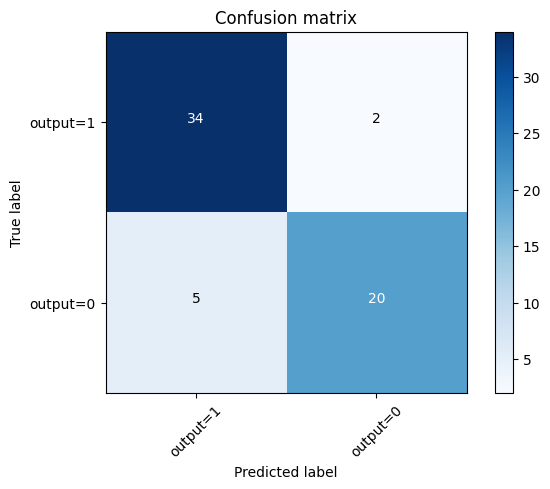

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **GradientBoostingClassifier** as the second model.<br>

In [55]:
from sklearn.ensemble import GradientBoostingClassifier


In [56]:
gradientB =GradientBoostingClassifier(n_estimators=100, max_depth =3)
gradientB.fit(X_train, Y_train)


GradientBoostingClassifier()

In [57]:
yhat=gradientB.predict(x_test)
yhat

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

# Evaluation GradientBoostingClassifier

**accuracy_score**

In [58]:
acc_GBC=metrics.accuracy_score(y_test, yhat)
acc_GBC

0.8852459016393442

**jaccard_score**

In [59]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [60]:
log_loss(y_test, yhat)

4.136156946292132

**f1_score**

In [61]:
print( classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


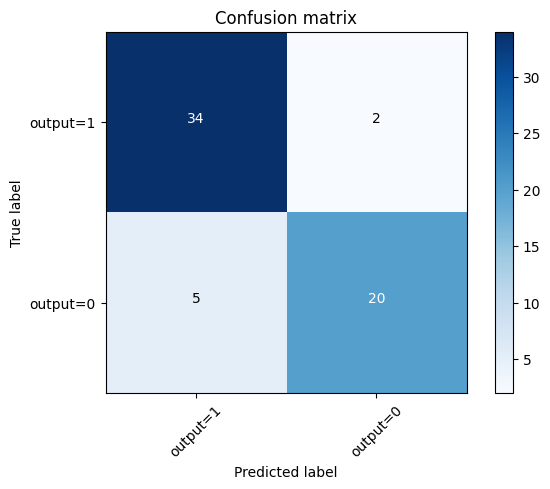

In [63]:
# Compute confusion matrix
cnf_matrix =confusion_matrix(y_test, yhat, labels =[1,0])
np.set_printoptions(precision =2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize =False,  title ='Confusion matrix')

We will try **LogisticRegression** as the third model.

In [64]:
from sklearn.linear_model import LogisticRegression
logisticR =LogisticRegression(C=0.01)
logisticR.fit(X_train,Y_train)
logisticR

LogisticRegression(C=0.01)

In [65]:
yhat =logisticR.predict(x_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

# Evaluation  LogisticRegression

**accuracy_score**

In [66]:
acc_lr=metrics.accuracy_score(y_test,yhat)
acc_lr

0.8852459016393442

**jaccard_score**

In [67]:
jaccard_score(y_test, yhat,pos_label=0)

0.7307692307692307

**log_loss**

In [68]:
log_loss(y_test, yhat)

4.136156946292132

**f1-score**

In [69]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35  1]
 [ 6 19]]


Confusion matrix, without normalization
[[35  1]
 [ 6 19]]


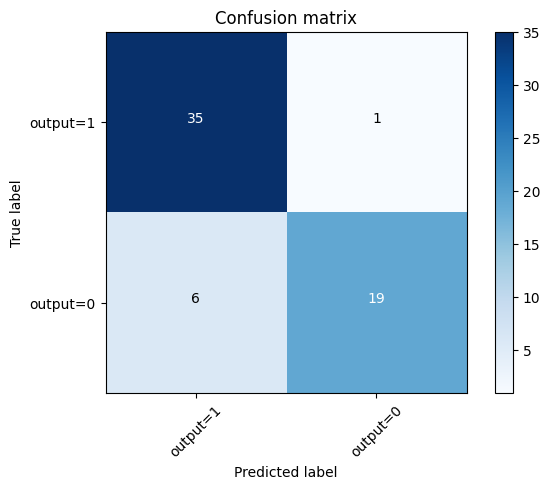

In [71]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **SVM** as the forth model.

In [72]:
from sklearn import svm
sVm= svm.SVC(kernel='linear')


In [73]:
sVm.fit(X_train, Y_train)

SVC(kernel='linear')

In [74]:
yhat = sVm.predict(x_test)
yhat [0:5]

array([1, 0, 1, 1, 1])

# Evaluation SVM

**accuracy_score**

In [75]:
acc_sVm=metrics.accuracy_score(y_test,yhat)
acc_sVm

0.8852459016393442

**jaccard_score**

In [76]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [77]:
log_loss(y_test, yhat)

4.136156946292132

**f1-score**

In [78]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


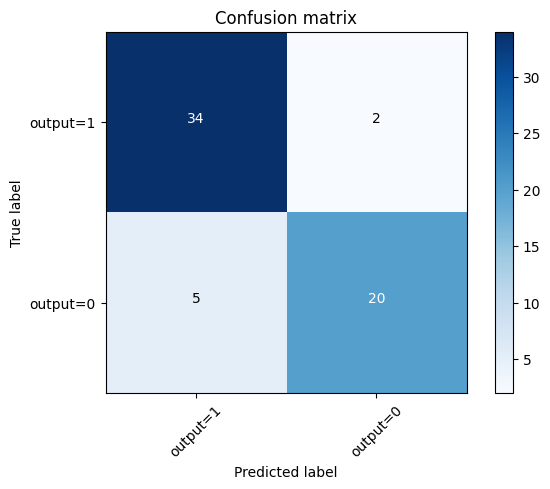

In [80]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **DecisionTreeClassifier** as the fifth model.

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
deTree =DecisionTreeClassifier(criterion="entropy")
deTree

DecisionTreeClassifier(criterion='entropy')

In [83]:
deTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
yhat = deTree.predict(x_test)
yhat[:5]

array([0, 1, 1, 1, 1])

# Evaluation DecisionTreeClassifier

**accuracy_score**

In [85]:
acc_deTree=metrics.accuracy_score(y_test,yhat)
acc_deTree

0.8524590163934426

**jaccard_score**

In [86]:
jaccard_score(y_test, yhat,pos_label=0)

0.6896551724137931

**log_loss**

In [87]:
log_loss(y_test,yhat)

5.31791607380417

**f1-score**

In [88]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.86      0.89      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[32  4]
 [ 5 20]]


Confusion matrix, without normalization
[[32  4]
 [ 5 20]]


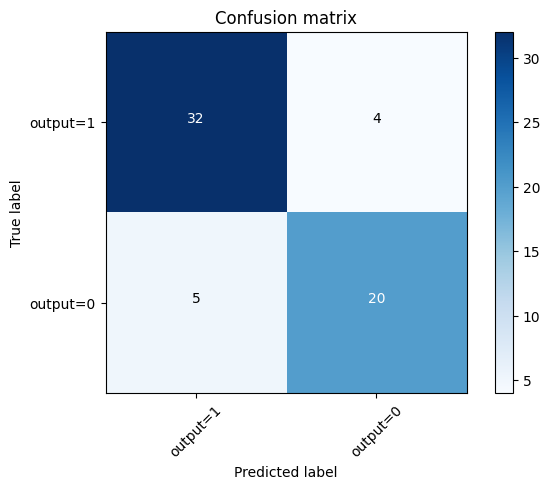

In [90]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **RandomForestClassifier** as the sixth model.

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [92]:
forestRandom= RandomForestClassifier(n_estimators=100 ,max_depth=3 , criterion="entropy")

In [93]:
forestRandom.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [94]:
yhat=forestRandom.predict(x_test)
yhat[:5]

array([1, 0, 1, 1, 1])

# Evaluation RandomForestClassifier

**accuracy_score**

In [95]:
acc_forest=metrics.accuracy_score(y_test,yhat)
acc_forest

0.9016393442622951

**jaccard_score**

In [96]:
jaccard_score(y_test, yhat,pos_label=0)

0.7692307692307693

**log_loss**

In [97]:
log_loss(y_test,yhat)

3.5452773825361135

**f1-score**

In [98]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35  1]
 [ 5 20]]


Confusion matrix, without normalization
[[35  1]
 [ 5 20]]


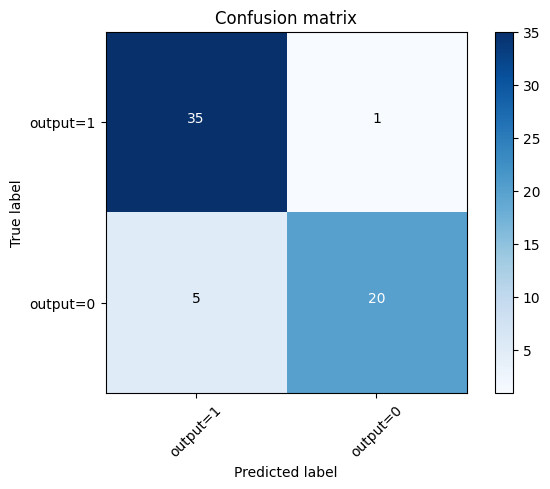

In [100]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

Saving heart-dataset.csv to heart-dataset (2).csv


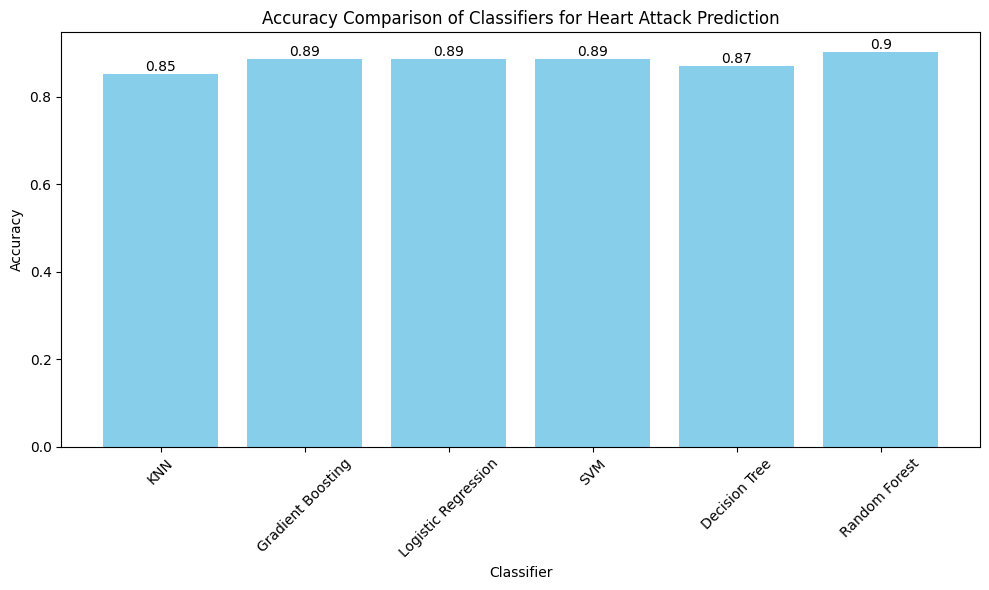

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report

# Load and preprocess the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("heart-dataset.csv")

df.rename(columns={"caa":"ca", 'thalachh':'thalach', 'restecg':'rest-ecg'}, inplace=True)

# Handle missing values for 'ca'
df['ca'] = df['ca'].replace(4, np.NAN)
df['ca'] = df['ca'].fillna(df['ca'].median())

# Features and labels
X = df[['age', 'sex', 'cp', 'chol', 'thalach', 'exng', 'oldpeak', 'slp', 'ca', 'thall']].values
y = df['output'].values

# Standardize features
X = StandardScaler().fit(X).transform(X.astype(float))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Dictionary to store accuracy results
accuracy_results = {}

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
yhat_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, yhat_knn)
accuracy_results['KNN'] = acc_knn

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gbc.fit(X_train, y_train)
yhat_gbc = gbc.predict(X_test)
acc_gbc = accuracy_score(y_test, yhat_gbc)
accuracy_results['Gradient Boosting'] = acc_gbc

# Logistic Regression
log_reg = LogisticRegression(C=0.01)
log_reg.fit(X_train, y_train)
yhat_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, yhat_lr)
accuracy_results['Logistic Regression'] = acc_lr

# Support Vector Machine (SVM)
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
yhat_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, yhat_svm)
accuracy_results['SVM'] = acc_svm

# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, yhat_dt)
accuracy_results['Decision Tree'] = acc_dt

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, criterion="entropy")
rf.fit(X_train, y_train)
yhat_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, yhat_rf)
accuracy_results['Random Forest'] = acc_rf

# Generate the comparison graph
plt.figure(figsize=(10,6))

# Plot all algorithms
bars = plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')

# Set titles and labels
plt.title('Accuracy Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Annotate accuracy values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the graph
plt.tight_layout()
plt.show()


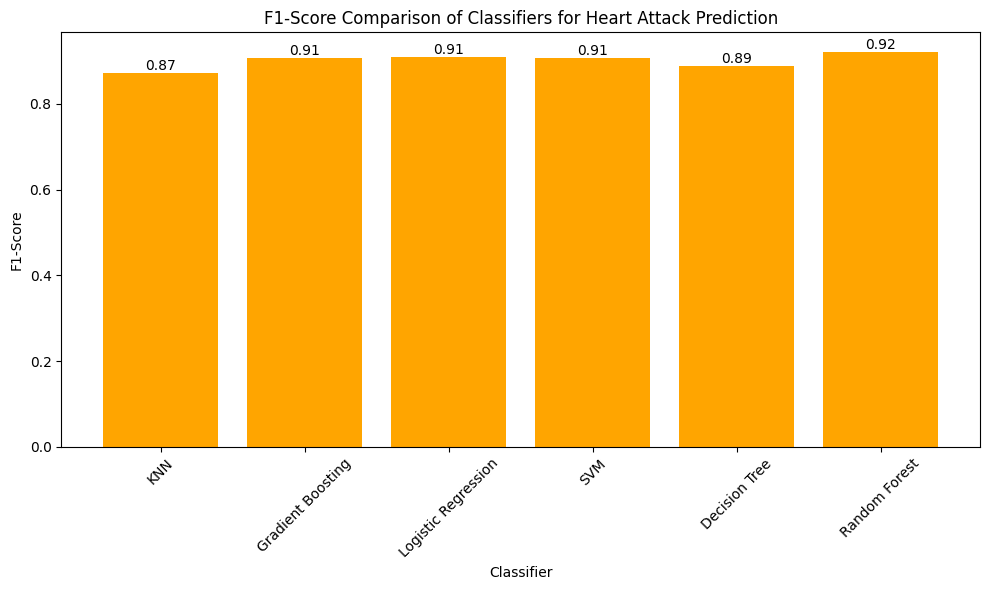

In [102]:
from sklearn.metrics import f1_score

f1_scores = {
    'KNN': f1_score(y_test, yhat_knn),
    'Gradient Boosting': f1_score(y_test, yhat_gbc),
    'Logistic Regression': f1_score(y_test, yhat_lr),
    'SVM': f1_score(y_test, yhat_svm),
    'Decision Tree': f1_score(y_test, yhat_dt),
    'Random Forest': f1_score(y_test, yhat_rf)
}

# Plot F1-score comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='orange')
plt.title('F1-Score Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

# Annotate F1 scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


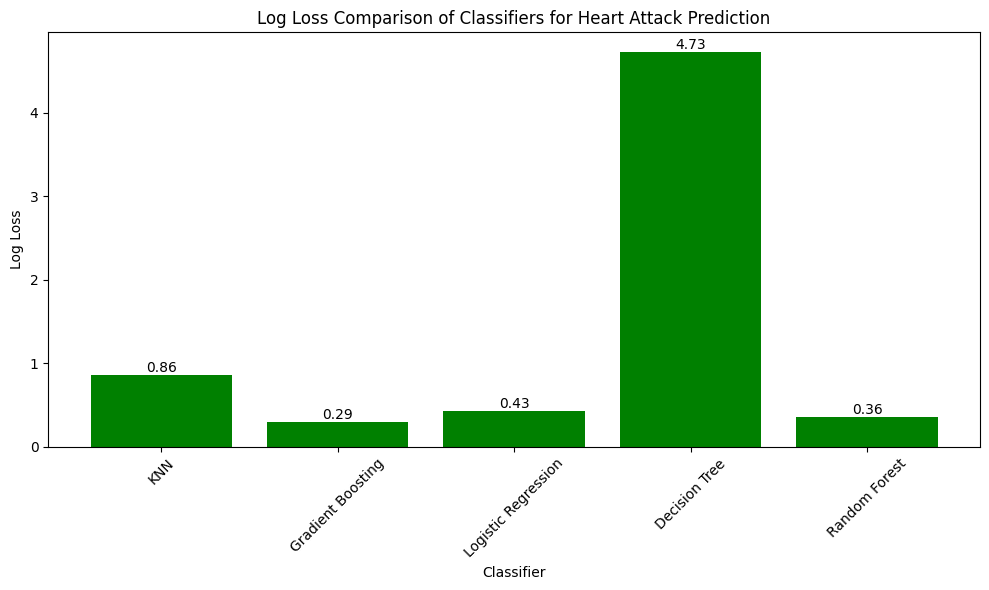

In [103]:
from sklearn.metrics import log_loss

log_loss_scores = {
    'KNN': log_loss(y_test, knn.predict_proba(X_test)),
    'Gradient Boosting': log_loss(y_test, gbc.predict_proba(X_test)),
    'Logistic Regression': log_loss(y_test, log_reg.predict_proba(X_test)),
    'Decision Tree': log_loss(y_test, dt.predict_proba(X_test)),
    'Random Forest': log_loss(y_test, rf.predict_proba(X_test))
}

# Plot log loss comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(log_loss_scores.keys(), log_loss_scores.values(), color='green')
plt.title('Log Loss Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('Log Loss')
plt.xticks(rotation=45)

# Annotate log loss on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


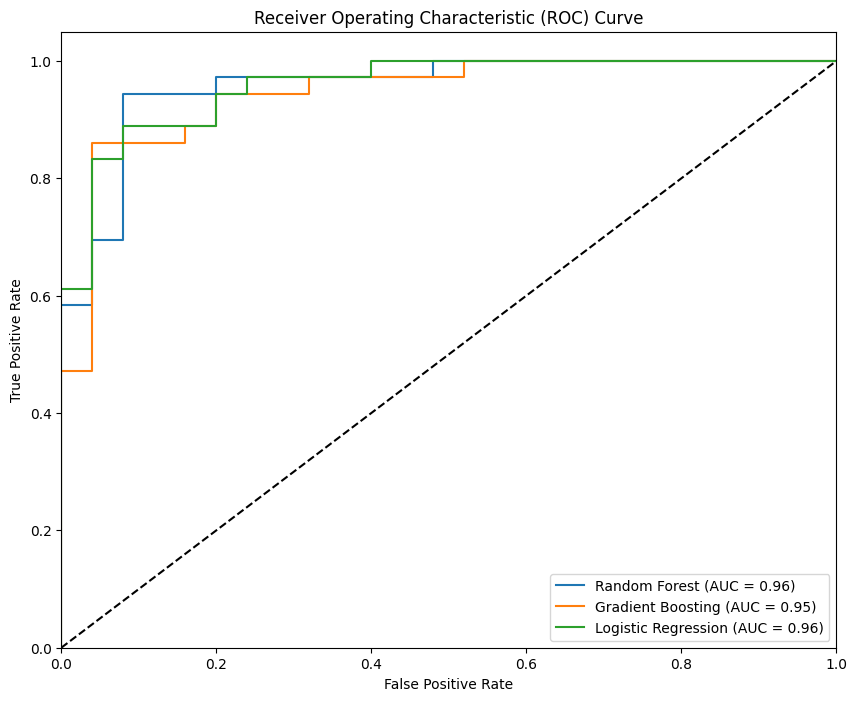

In [104]:
from sklearn.svm import SVC

# Set probability=True when initializing the SVC model
svm_model = SVC(probability=True)  # Enable probability estimates

# Train the model
svm_model.fit(X_train, y_train)

# Now you can use predict_proba() to get the ROC curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # For probabilistic classifiers
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Plot ROC curves for multiple algorithms
plot_roc_curve(rf, X_test, y_test, 'Random Forest')
plot_roc_curve(gbc, X_test, y_test, 'Gradient Boosting')
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
# plot_roc_curve(svm_model, X_test, y_test, 'SVM')  # SVM with probability=True

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


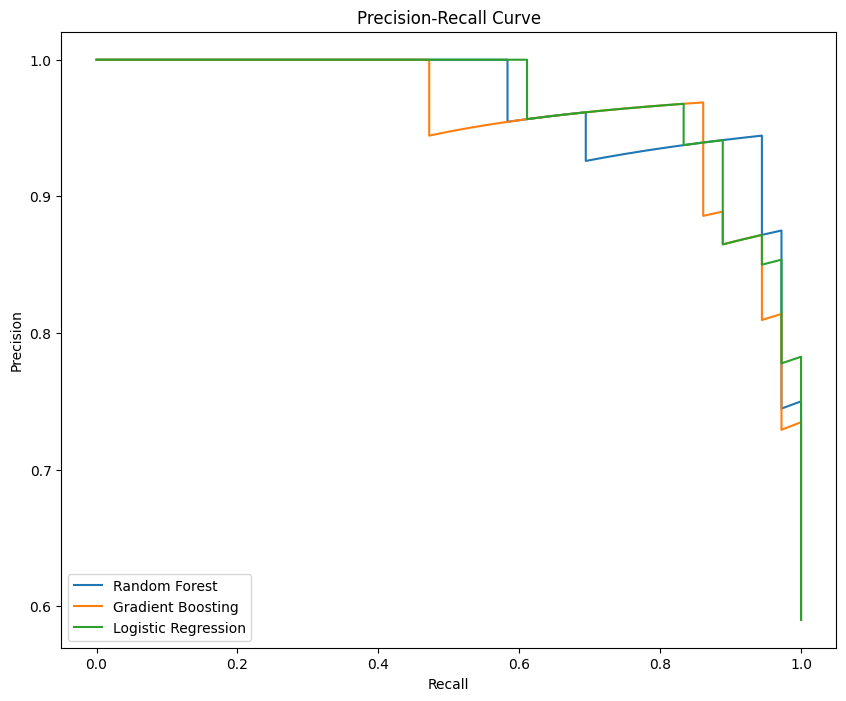

In [105]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot Precision-Recall curve
def plot_pr_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Use predicted probabilities
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{label}')

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curves for multiple algorithms
plot_pr_curve(rf, X_test, y_test, 'Random Forest')
plot_pr_curve(gbc, X_test, y_test, 'Gradient Boosting')
plot_pr_curve(log_reg, X_test, y_test, 'Logistic Regression')
# plot_pr_curve(svm_model, X_test, y_test, 'SVM')  # SVM with probability=True

# Customize plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


According to the given outputs, it seems that the two algorithms **RandomForestClassifier** and **LogisticRegression** were able to have the lowest FN value for testing data, which is good.<br> Of course, the percentage of this value was also good for other algorithms.<br>
But in general, the **Randomforest algorithm** has given better output to our data and its fp value is also lower,<br> which means a lower error percentage of this algorithm.